In [9]:
import pypsa
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import os
import pandas as pd

%matplotlib inline
plt.rc("figure", figsize = (10,10))

In [5]:
network = pypsa.examples.ac_dc_meshed(from_master = True)

INFO:pypsa.io:Imported network ac-dc-meshed.nc has buses, carriers, generators, global_constraints, lines, links, loads


In [4]:
lines_current_type = network.lines.bus0.map(network.buses.carrier)
lines_current_type

Line
0    AC
1    AC
2    DC
3    DC
4    DC
5    AC
6    AC
Name: bus0, dtype: object

c:\users\shnab\appdata\local\programs\python\python39\lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


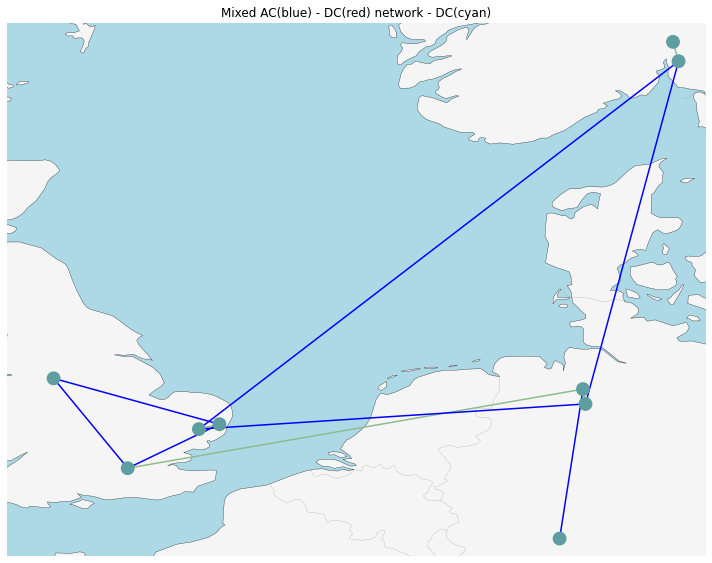

In [11]:
network.plot(line_colors=lines_current_type.map(lambda ct: "r" if ct=="Dc" else "b"),
            title = "Mixed AC(blue) - DC(red) network - DC(cyan)",
            color_geomap=True,
            jitter = 0.3)
plt.tight_layout()
plt.show()

In [12]:
network.generators

,bus,capital_cost,efficiency,marginal_cost,p_nom,p_nom_extendable,p_nom_min,carrier,control,type,...,min_up_time,min_down_time,up_time_before,down_time_before,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down,weight,p_nom_opt
Generator,,,,,,,,,,,,,,,,,,,,,
Manchester Wind,Manchester,2793.651603,1.000000,0.110000,80.0,True,100.0,wind,PQ,,...,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0
Manchester Gas,Manchester,196.615168,0.350026,4.532368,50000.0,True,0.0,gas,PQ,,...,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0
Norway Wind,Norway,2184.374796,1.000000,0.090000,100.0,True,100.0,wind,PQ,,...,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0
Norway Gas,Norway,158.251250,0.356836,5.892845,20000.0,True,0.0,gas,PQ,,...,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0
Frankfurt Wind,Frankfurt,2129.456122,1.000000,0.100000,110.0,True,100.0,wind,PQ,,...,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0
Frankfurt Gas,Frankfurt,102.676953,0.351666,4.086322,80000.0,True,0.0,gas,PQ,,...,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0


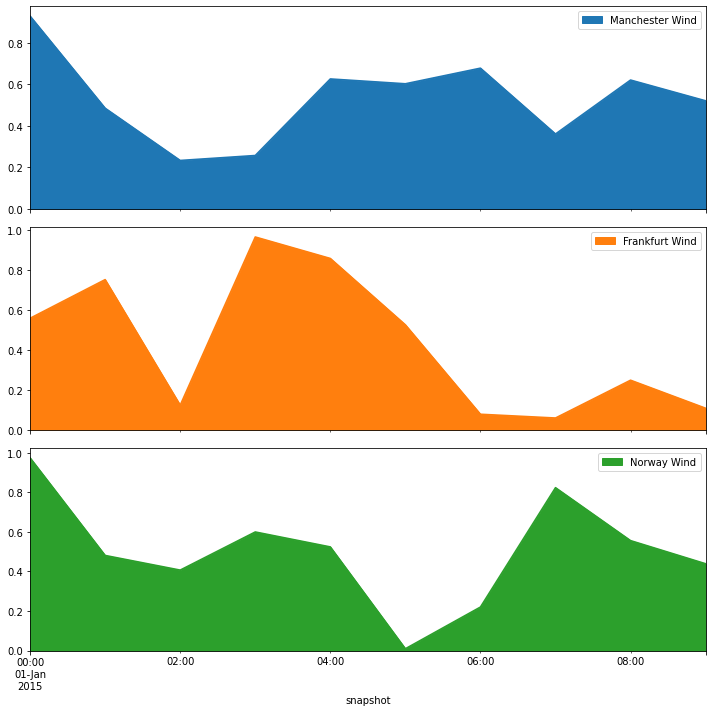

In [15]:
network.generators_t.p_max_pu.plot.area(subplots=True)
plt.tight_layout()

In [16]:
network.optimize()

Index(['2', '3', '4'], dtype='object', name='Line')
Index(['0', '1', '5', '6'], dtype='object', name='Line')
Index(['2', '3', '4'], dtype='object', name='Line')
Index(['0', '1', '5', '6'], dtype='object', name='Line')
c:\users\shnab\appdata\local\programs\python\python39\lib\site-packages\xarray\core\utils.py:494: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  warnings.warn(
c:\users\shnab\appdata\local\programs\python\python39\lib\site-packages\xarray\core\utils.py:494: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  warnings.warn(
c:\users\shnab\appdata\local\programs\python\python39\lib\si

c:\users\shnab\appdata\local\programs\python\python39\lib\site-packages\xarray\core\utils.py:494: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  warnings.warn(
c:\users\shnab\appdata\local\programs\python\python39\lib\site-packages\xarray\core\utils.py:494: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  warnings.warn(
c:\users\shnab\appdata\local\programs\python\python39\lib\site-packages\xarray\core\utils.py:494: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a map

RuntimeError: No solver installed.